In [182]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import category_encoders as ce 

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [183]:
data = pd.read_csv('C:/DS/eda_4/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Ключевые вопросы HR-агентства:  
1.Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?  
2.Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?  
3.Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?  
4.Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?  
5. Какие факторы влияют на зарплату специалиста Data Scientist. 

In [185]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


Проверим данные на наличие полных дубликатов:

In [186]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))


Количество дубликатов: 0


1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

In [188]:
data_scientist_data = data[data['job_title'] == 'Data Scientist']# фильтруем по специальности Data Scientist
data_scientist_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


1.1. Визуализация распределения заработной платы DS по годам гисторамма и график

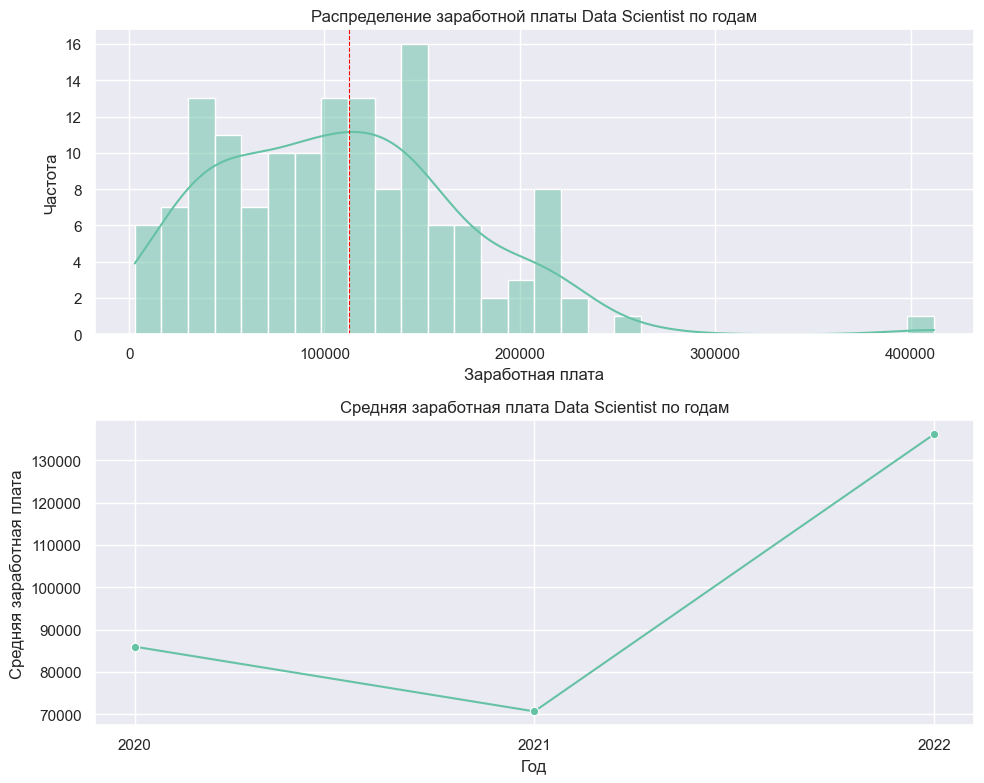

In [242]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(x='salary_in_usd', data=data_scientist_data, bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы Data Scientist по годам')
axes[0].set_xlabel('Заработная плата')
axes[0].set_ylabel('Частота')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

# Временной график средней заработной платы
grouped_data = data_scientist_data.groupby('work_year')['salary_in_usd'].mean().reset_index()
grouped_data['work_year']=grouped_data['work_year'].astype(str)
sns.lineplot(x='work_year', y='salary_in_usd', data=grouped_data, marker='o', ax=axes[1])
axes[1].set_title('Средняя заработная плата Data Scientist по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Средняя заработная плата')

plt.tight_layout()
plt.show()


Форма гистограммы несимметрична, делаем промежуточный вывод: распределение заработной платы по годам не является нормальным. Средняя заработная плата в 21 году ниже , чем в 2020, а средняя заработная плата в 2021 выче чем в 21 и 20 годах.


1.2. Визуализация распределения заработной платы DS по годам коробчатая диаграмма


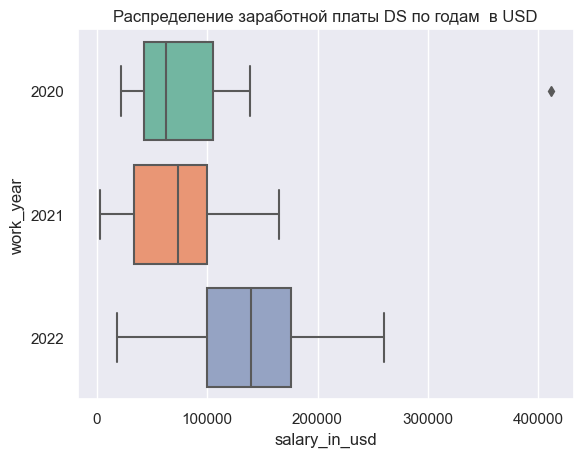

In [190]:
ax = sns.boxplot(data_scientist_data, x='salary_in_usd',y='work_year', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS по годам  в USD')
plt.show()

Из коробчатой диаграммы диаграммы видно, что медианы по годам не совпадают, основной уровень заработной платы в 20 и 21 годах почти совпадают, верхние границы (верхний квартиль) находятся практически на одном уровне. Нижний квартиль в 21 году ниже чем в 20, в 22 году виден рост и нижний квартиль почти совпадает с верхним предыдущих лет. Длина усов в 22 году значительно больше предыдущих лет, что говорит о большем разбросе уровня зарабоной платы в 2022 году.   

1.3.Анализ заработной платы в 2020 году

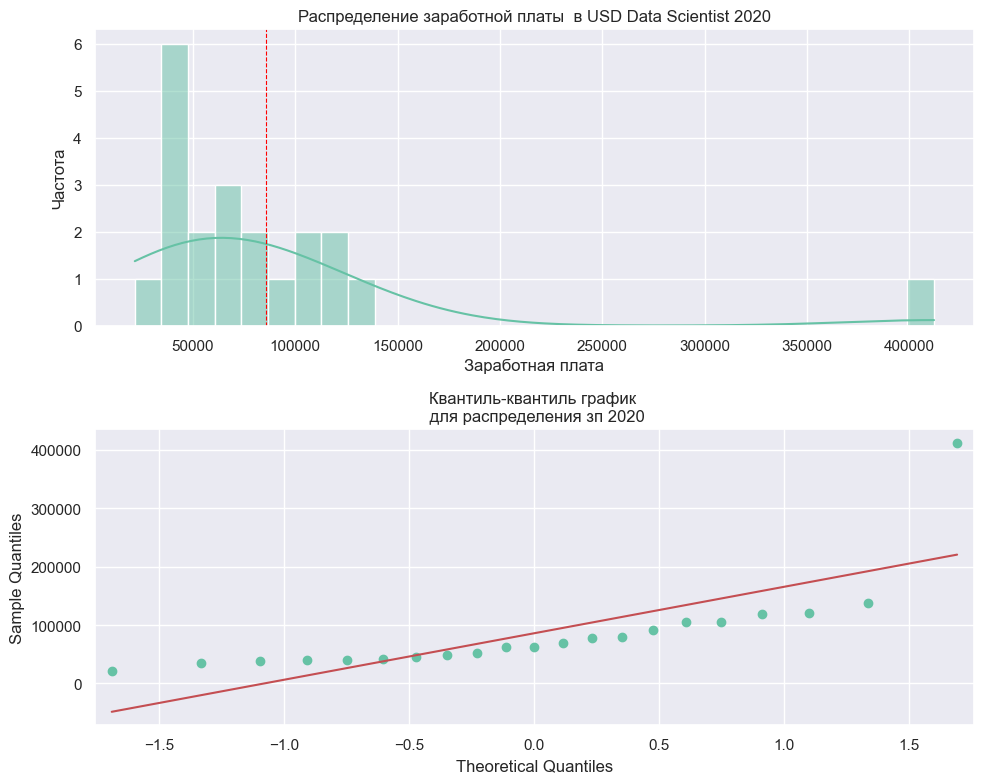

In [191]:
data_scientist_data = data[data['job_title'] == 'Data Scientist']
data_scientist_data_2020=data_scientist_data[data_scientist_data['work_year']==2020]
data_scientist_data_2020.head()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Boxplot заработной платы
sns.histplot(x='salary_in_usd', data=data_scientist_data_2020, bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы  в USD Data Scientist 2020')
axes[0].set_xlabel('Заработная плата')
axes[0].set_ylabel('Частота')
axes[0].axvline(data_scientist_data_2020['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)


data_qq_2020=data_scientist_data_2020['salary_in_usd']
# задаём параметры квантиль-квантиль графика
sm.qqplot(data_qq_2020, line='s', ax=axes[1])
plt.title('Квантиль-квантиль график \n для распределения зп 2020')
#plt.show()

plt.tight_layout()
plt.show()


#plt.show()
#grouped_data = data_scientist_data.groupby('work_year')['salary_in_usd']
#grouped_data.head()


Проведем тест Шапиро-Уилка на выборке данных 2020 года

In [192]:
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_qq_2020)

print('p-value = %.6f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')



p-value = 0.000002
Распределение не нормальное


1.4.Анализ заработной платы в 2021 году

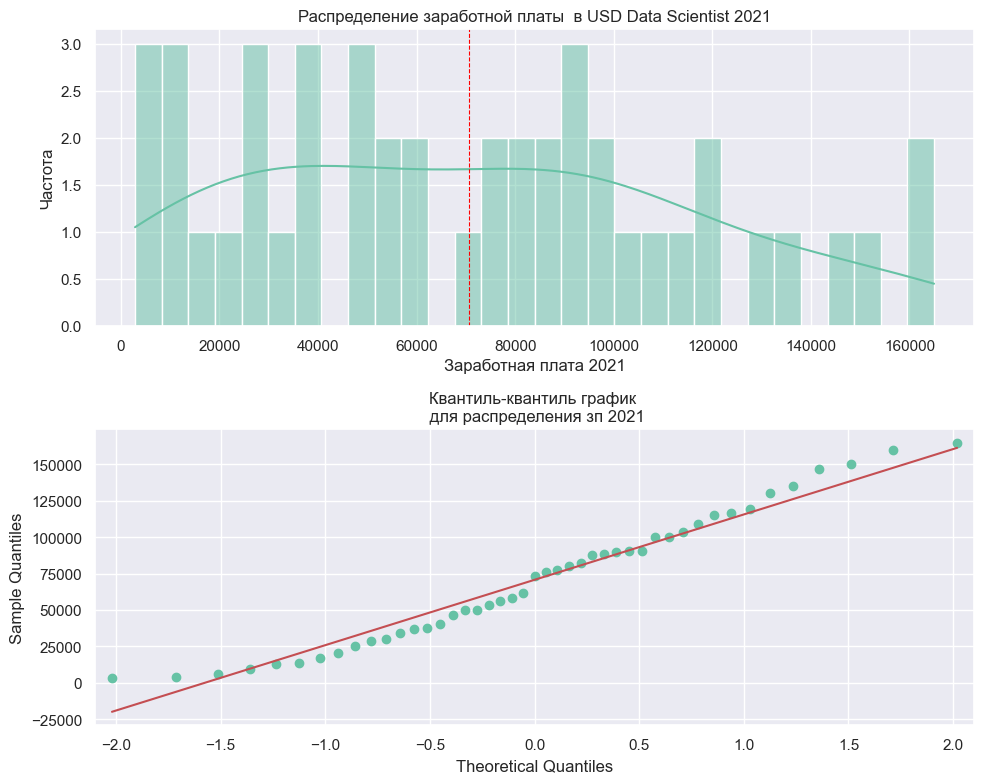

In [193]:

data_scientist_data_2021=data_scientist_data[data_scientist_data['work_year']==2021]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Boxplot заработной платы
sns.histplot(x='salary_in_usd', data=data_scientist_data_2021, bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы  в USD Data Scientist 2021')
axes[0].set_xlabel('Заработная плата 2021')
axes[0].set_ylabel('Частота')
axes[0].axvline(data_scientist_data_2021['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)


data_qq_2021=data_scientist_data_2021['salary_in_usd']
# задаём параметры квантиль-квантиль графика
sm.qqplot(data_qq_2021, line='s', ax=axes[1])
plt.title('Квантиль-квантиль график \n для распределения зп 2021')
#plt.show()

plt.tight_layout()
plt.show()



Форма гистограммы близка к симетричной , делаем промежуточный вывод: распределение заработной платы 2021  является нормальным.

Проведем тест Шапиро-Уилка на выборке данных 2021 года

In [194]:
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_qq_2021)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.124576
Распределение нормальное


1.5.Анализ заработной платы в 2022 году

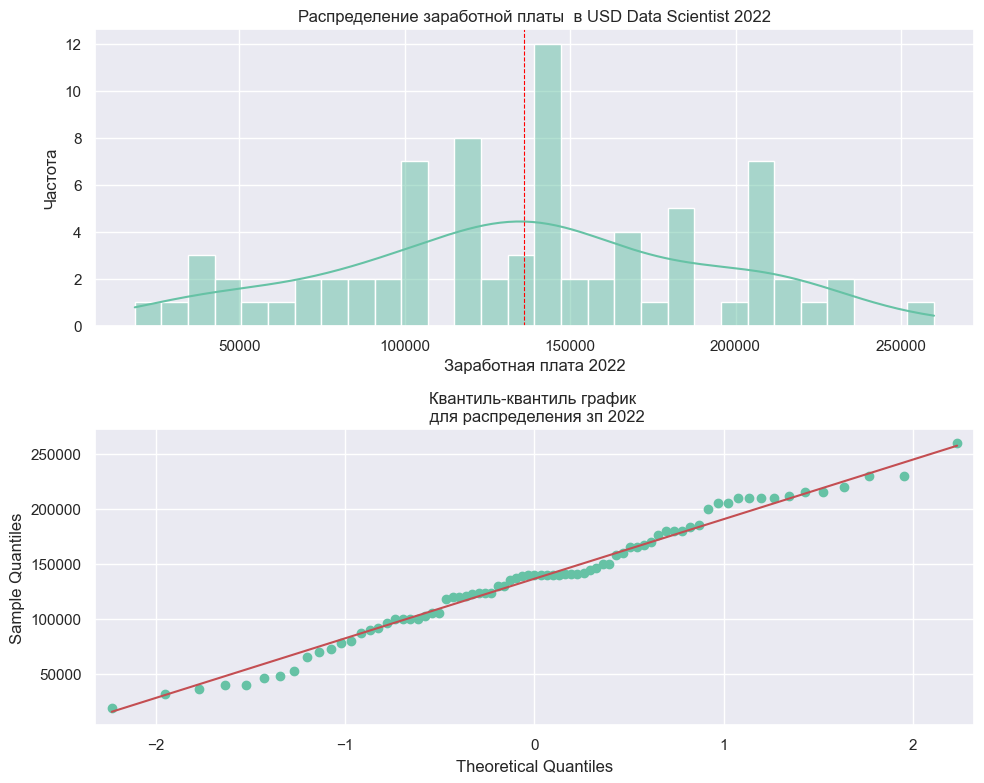

In [195]:
data_scientist_data_2022=data_scientist_data[data_scientist_data['work_year']==2022]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Boxplot заработной платы
sns.histplot(x='salary_in_usd', data=data_scientist_data_2022, bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы  в USD Data Scientist 2022')
axes[0].set_xlabel('Заработная плата 2022')
axes[0].set_ylabel('Частота')
axes[0].axvline(data_scientist_data_2022['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
#квантиль-квантиль график
data_qq_2022=data_scientist_data_2022['salary_in_usd']
# задаём параметры квантиль-квантиль графика
sm.qqplot(data_qq_2022, line='s', ax=axes[1])
plt.title('Квантиль-квантиль график \n для распределения зп 2022')
plt.tight_layout()
plt.show()


Форма гистограммы близка к симетричной , делаем промежуточный вывод: распределение заработной платы 2021  является нормальным.

Проведем тест Шапиро-Уилка на выборке данных 2022 года

In [196]:
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_qq_2022)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.326881
Распределение нормальное


1.6. Выбот теста, формулировка и проверка гипотезы
1.6.1. Проверка 2020 и 2021 годов

Из  представленных данных выборки заработной платы DS 2022 и 2021 годов являются нормалными и выборки 2021 не являются нормалными.

Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
Наблюдается ли рост зараплат у срециалистов DS 2020 и 2021? 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):  заработная плата DS 2020 года  ($μ_1$)  статистически больше либо равна размеру заработной платы в 2021 году ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$):  заработная плата DS 2020 года ($μ_1$) статистически меньше, чем  заработная плата в 2021   ($μ_2$).

$$ H_1 : μ_1 < μ_2$$
Для проверки  гипотезы  используем U-критерий Манна — Уитни для сравнения распределений на основе рангов.

In [197]:
# проводим тест
import scipy.stats as stats
_, p = stats.mannwhitneyu(data_scientist_data_2020['salary_in_usd'], data_scientist_data_2021['salary_in_usd'], alternative='less')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.685
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


 У нас нет оснований отвергать нулевую гипотезу, заработная плата 2020 года статистичсески больше, чем в 2021, рост от 2020 года к 2021 отсутствует.

1.6.2. Проверка 2021 и 2022 годов 

Теперь проверим наблюдается ли рост зараплат у срециалистов DS 2021 и 2022? 
Из выполненого ранее теста Шапиро-Уилка на выборке данных 2021 и 2022  годах мы выяснили, что выборки с нормальным распределением, значит используем Двухвыборочный t-критерий.
Наблюдается ли рост зараплат у срециалистов DS 2021 и 2022? 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):  заработная плата DS 2021 года  ($μ_1$)  статистически больше либо равена размеру заработной платы в 2022 году ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$):  заработная плата DS 2021 года ($μ_1$) статистически меньше, чем  заработная плата в 2022   ($μ_2$).

$$ H_1 : μ_1 < μ_2$$


In [198]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_scientist_data_2021['salary_in_usd'], data_scientist_data_2022['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_scientist_data_2021['salary_in_usd'], data_scientist_data_2022['salary_in_usd'], alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


Тест на равенство дисперсий
p-value = 0.445
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: По результатам теста делаем выводы, что заработная плата растет.

2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

In [199]:
data_ds_de_2022=data[(data['job_title'].isin(['Data Scientist','Data Engineer']))&(data['work_year']==2022)]#фильтруем согласно условию
data_ds_de_2022.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
289,289,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
292,292,2022,MI,FT,Data Scientist,130000,USD,130000,US,0,US,M
293,293,2022,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M
294,294,2022,MI,FT,Data Engineer,170000,USD,170000,US,100,US,M
295,295,2022,MI,FT,Data Engineer,150000,USD,150000,US,100,US,M


In [200]:
data_ds_de_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 289 to 603
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          166 non-null    int64 
 1   work_year           166 non-null    int64 
 2   experience_level    166 non-null    object
 3   employment_type     166 non-null    object
 4   job_title           166 non-null    object
 5   salary              166 non-null    int64 
 6   salary_currency     166 non-null    object
 7   salary_in_usd       166 non-null    int64 
 8   employee_residence  166 non-null    object
 9   remote_ratio        166 non-null    int64 
 10  company_location    166 non-null    object
 11  company_size        166 non-null    object
dtypes: int64(5), object(7)
memory usage: 16.9+ KB


2.1. Визуализация распределения ЗП DS и  DE в 2022году.

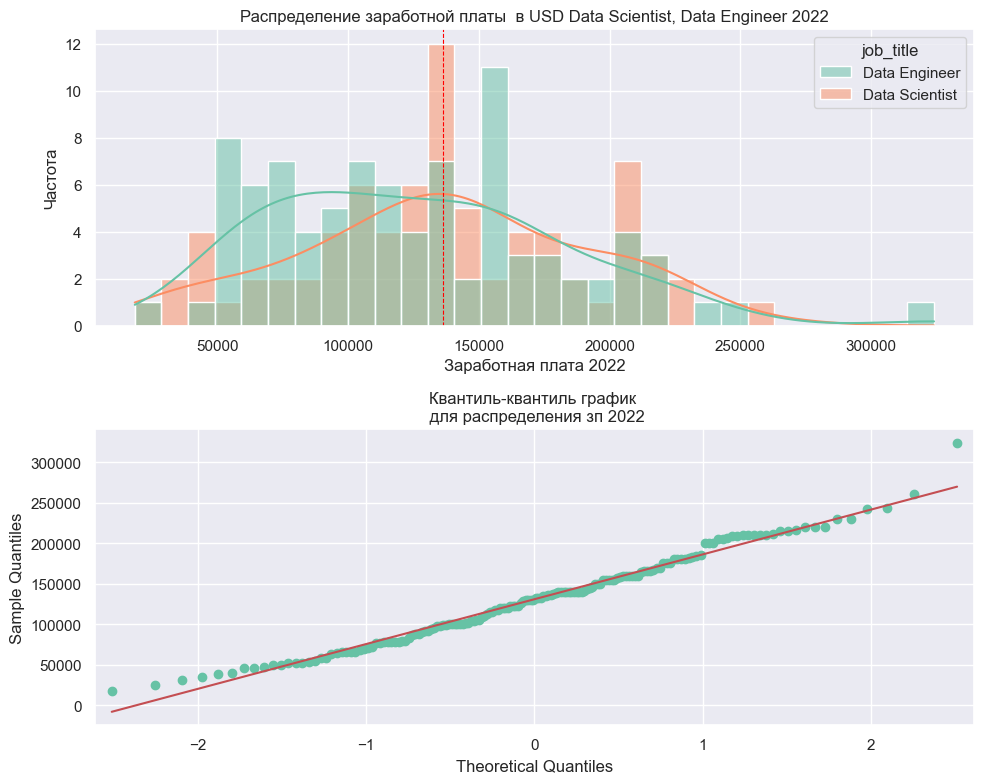

In [201]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Boxplot заработной платы
sns.histplot(x='salary_in_usd', data=data_ds_de_2022, hue='job_title', bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы  в USD Data Scientist, Data Engineer 2022')
axes[0].set_xlabel('Заработная плата 2022')
axes[0].set_ylabel('Частота')
axes[0].axvline(data_scientist_data_2022['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
#квантиль-квантиль график
data_ds_de_qq_2022=data_ds_de_2022['salary_in_usd']
# задаём параметры квантиль-квантиль графика
sm.qqplot(data_ds_de_qq_2022, line='s', ax=axes[1])
plt.title('Квантиль-квантиль график \n для распределения зп 2022')
plt.tight_layout()
plt.show()


Визуально  выборки имеют разное распределение. 
Выше мы проверяли на нормальность распределение признака заработной платы DS  в 2022 году, оно вышло нормальным. Проверим распределение заработной платы DE.

2.2. Проверка на нормальность

In [202]:
#data[(data['job_title'].isin(['Data Scientist','Data Engineer']))&(data['work_year']==2022)]
data_de_2022=data_ds_de_2022[(data_ds_de_2022['job_title'].isin(['Data Engineer']))]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_de_2022['salary_in_usd'])
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.009988
Распределение не нормальное


2.3. Выбот теста, формулирование и проверка гипотезы.

В итоге распределение заработной платы DS нормальное, а DE не нормальное, следовательно применяем непараметрические тесты.
Сформулируем задачу таким образом:  Заработные платы DS  в 2022 году выше заработных плат DE.
**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$):  заработная плата DS 2022 года  ($μ_1$)  статистически меньше  либо равна размеру заработной платы DE в 2022 году ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$):  заработная плата DS 2022 году ($μ_1$) статистически больше, чем  заработная плата DE в 2022   ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

Для проверки  гипотезы  используем U-критерий Манна — Уитни для сравнения распределений на основе рангов.
Предварительно уберем выбросы в заработной платен DE.

In [203]:
# Вычислите межквартильный размах (IQR)
Q1 = data_de_2022['salary_in_usd'].quantile(0.25)
Q3 = data_de_2022['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Определите границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруйте данные, оставляя только строки без выбросов
df_filtered = data_de_2022[(data_de_2022['salary_in_usd'] >= lower_bound) & (data_de_2022['salary_in_usd'] <= upper_bound)]

# Выведите обновленный DataFrame
print(df_filtered)

     Unnamed: 0  work_year experience_level employment_type      job_title   
289         289       2022               SE              FT  Data Engineer  \
294         294       2022               MI              FT  Data Engineer   
295         295       2022               MI              FT  Data Engineer   
304         304       2022               EN              FT  Data Engineer   
309         309       2022               EX              FT  Data Engineer   
..          ...        ...              ...             ...            ...   
579         579       2022               SE              FT  Data Engineer   
582         582       2022               SE              FT  Data Engineer   
583         583       2022               SE              FT  Data Engineer   
602         602       2022               SE              FT  Data Engineer   
603         603       2022               SE              FT  Data Engineer   

     salary salary_currency  salary_in_usd employee_residence  

In [204]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_scientist_data_2022['salary_in_usd'], df_filtered['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_scientist_data_2022['salary_in_usd'], df_filtered['salary_in_usd'], alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство дисперсий
p-value = 0.852
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.075
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: Тест показал,что статистически  заработная плата DS меньше , чем DE, хотя при исседовании медианы и среднего, графически с помощью коробчатогй диаграммы  показывает обратное. Исследования приведены ниже. Скорее всего это связано с малыми выборками, и не значительным отклонением p-value от уровня значимости. 

Дополнительные исследования:

In [205]:
ds_de = data_ds_de_2022.groupby('job_title')[['salary_in_usd']].median()
round(ds_de,2)

,salary_in_usd
job_title,
Data Engineer,120000.0
Data Scientist,140000.0


In [206]:
ds_de = data_ds_de_2022.groupby('job_title')[['salary_in_usd']].mean()
round(ds_de,2)

,salary_in_usd
job_title,
Data Engineer,126375.70
Data Scientist,136172.09


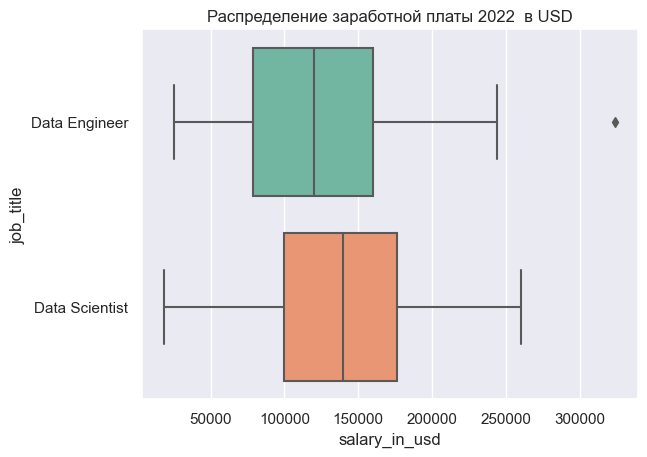

In [207]:
ax = sns.boxplot(data_ds_de_2022, x='salary_in_usd',y='job_title', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы 2022  в USD')
plt.show()

Из коробчатой диаграммы  видно, что медианы по DS и DE не совпадают, верхние границы (верхний квартиль) и нижние границы  у DE выше. Длина усов у DE чуть больше, что говорит о большем разбросе уровня зарабоной платы DE чем у DS. 

In [208]:
data_de_2022['salary_in_usd'].describe()
len(data_de_2022['salary_in_usd'])

89

In [209]:
data_scientist_data_2022['salary_in_usd'].describe()
len(data_scientist_data_2022['salary_in_usd'])

77

3.Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

3.1.Исследования медианной и средней ЗП в разрезе величин компаний, визуализация. 

Исследуем медианную заработную плату по категориям размерв компании.

In [210]:
data_scientist_data_size = data_scientist_data.groupby('company_size')['salary_in_usd'].median()
data_scientist_data_size.head()

company_size
L     90734.0
M    130000.0
S     49268.0
Name: salary_in_usd, dtype: float64

Медианная заработная плата у компаний среднего размера выше, чем у компаний большего размера, вероятно это обусловлено, что у крупных компаний ТОП менеджеры получают значительно больше заработные платы, чем в средних, так как структура управления в средних и маленьких компаниях не такая сложная как в крупных. 

In [211]:
#сравним средние зп по годам  и размерам компаний 
data_scientist_data_pivot = pd.pivot_table(data_scientist_data, values='salary_in_usd', index='work_year',columns='company_size')
data_scientist_data_pivot.head()

company_size,L,M,S
work_year,,,
2020,123068.142857,83760.500000,60886.2
2021,83157.375000,68261.090909,43357.9
2022,127989.071429,139442.000000,48000.0


<Axes: title={'center': 'Средние заработные платы по годам '}, xlabel='Год', ylabel='Средняя зв а usd'>

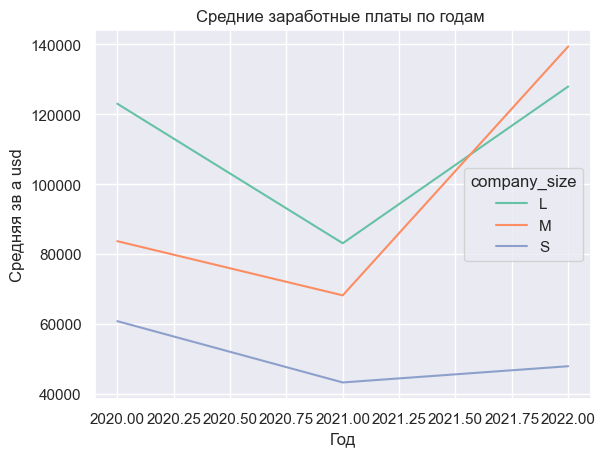

In [212]:
data_scientist_data_pivot.plot(title='Средние заработные платы по годам ',
                                        xlabel='Год',
                                        ylabel='Средняя зв а usd')

Из графика видно, что минимальные заработные платы идут в логике величин компаний, видим спад в заработных платах в 2020 году, что связано с covid, и средние  ЗП  в 2022 году у средних компаний выше, чем у крупных. 

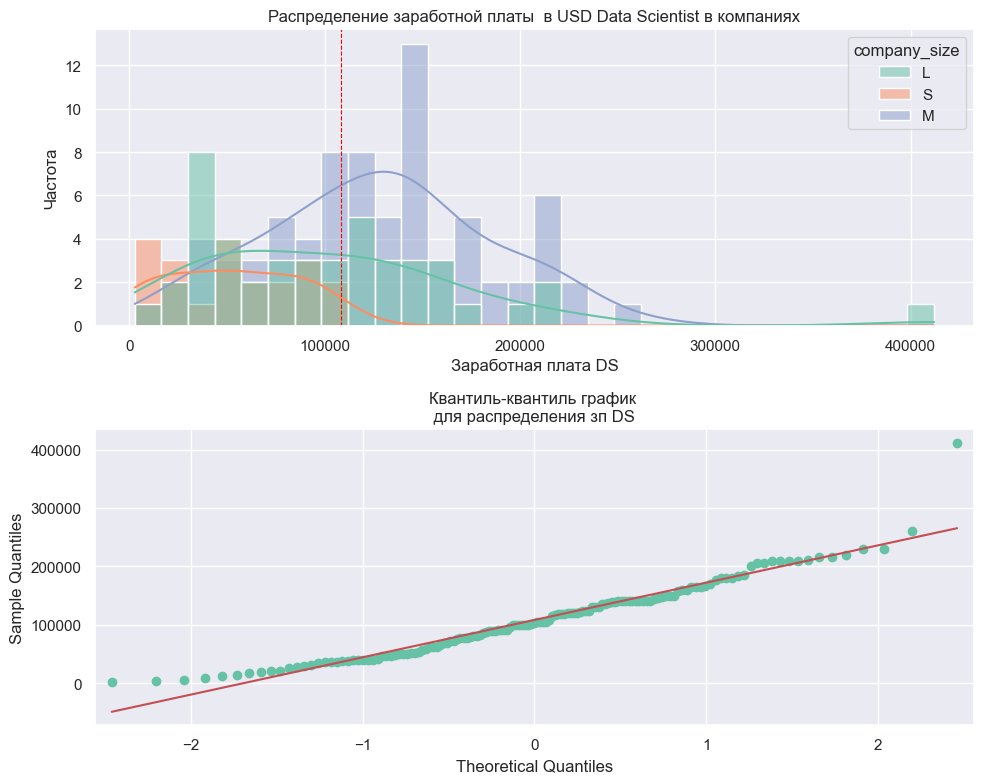

In [213]:
data_ds_company_size=data[(data['job_title'].isin(['Data Scientist']))]
data_ds_company_size.head()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Boxplot заработной платы
sns.histplot(x='salary_in_usd', data=data_ds_company_size, hue='company_size', bins=30, kde=True,ax=axes[0])
axes[0].set_title('Распределение заработной платы  в USD Data Scientist в компаниях')
axes[0].set_xlabel('Заработная плата DS')
axes[0].set_ylabel('Частота')
axes[0].axvline(data_ds_company_size['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
#квантиль-квантиль график
data_ds_company_size_qq=data_ds_company_size['salary_in_usd']
# задаём параметры квантиль-квантиль графика
sm.qqplot(data_ds_company_size_qq, line='s', ax=axes[1])
plt.title('Квантиль-квантиль график \n для распределения зп DS ')
plt.tight_layout()
plt.show()

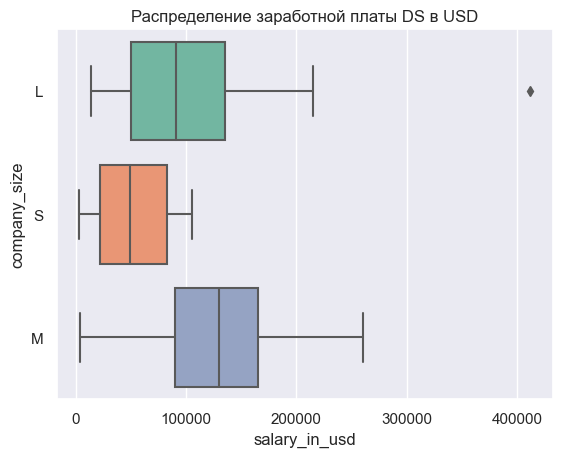

In [214]:
ax = sns.boxplot(data_ds_company_size, x='salary_in_usd',y='company_size', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS в USD')
plt.show()

3.2. Проверка на нормальность распределения заработных плат в зависимости от величины компании.

3.2.1.Для компаний L

In [215]:
#data_scientist_data_2022=data_scientist_data[data_scientist_data['work_year']==2022]
DS_L=data_scientist_data[data_scientist_data['company_size']=='L']
DS_L.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
32,32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
48,48,2020,MI,FT,Data Scientist,105000,USD,105000,US,100,US,L


In [216]:
DS_L_salary=DS_L['salary_in_usd']

In [217]:
 # тест для компаний L

_, p = stats.shapiro(DS_L_salary)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.000034
Распределение не нормальное


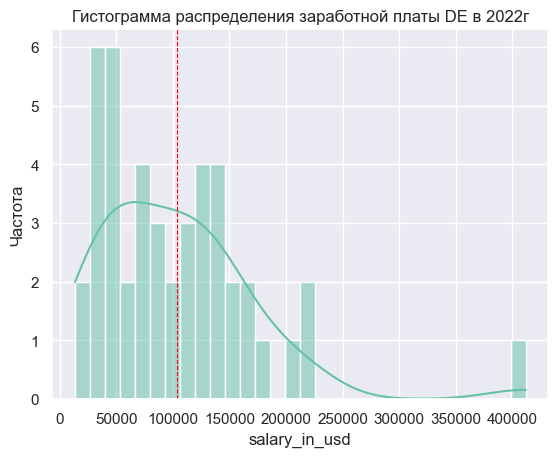

In [218]:
# задаём параметры гистограммы
ax = sns.histplot(DS_L['salary_in_usd'], bins=30, kde=True)
ax.set(xlabel='salary_in_usd', ylabel='Частота')
plt.title('Гистограмма распределения заработной платы DE в 2022г')
ax.axvline(DS_L['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

3.2.2.Для компаний M

In [219]:
DS_M=data_scientist_data[data_scientist_data['company_size']=='M']
DS_M_salary=DS_M['salary_in_usd']
# тест для компаний M
_, p = stats.shapiro(DS_M_salary)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.638920
Распределение нормальное


3.2.3.Для компаний S

In [220]:
DS_S=data_scientist_data[data_scientist_data['company_size']=='S']
DS_S_salary=DS_S['salary_in_usd']
# тест для компаний M
_, p = stats.shapiro(DS_S_salary)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.189027
Распределение нормальное


Заработная плата компаний S и M имеют нормальное распределение, а L не нормальное. Для исследования восподьзуемся критерием Краскела-Уоллиса 

3.3. Выбор теста, формулировка и проверка гипотезы 

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: заработные платы не  отличается в компаниях различных размеров: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: Заработные платы отличаются  в  компаниях различных размеров: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



In [221]:
# проводим тест
_, p = stats.kruskal(DS_S_salary, DS_M_salary, DS_L_salary)
print('p-value = {:.6f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

p-value = 0.000001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


### Вывод: заработные платы отличаются в компаниях различных размеров. 

### 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?  

4.1. Предобработка данных

In [222]:
data['job_ds_de']=data['job_title'].apply(lambda x: 'ds/de' if x in ['Data Scientist','Data Engineer'] else "others")#новый столбец, где две категории 

In [223]:
# найдем количество  сотрудников ds/de и "иных" в компаниях разной величины 
data_dsde=data[data['job_ds_de']=='ds/de']
data_oth=data[data['job_ds_de']=='others']
data_groupby_dsde=data_dsde.groupby('company_size')['job_ds_de'].count()
print('количество сотрудников ds/de \n', data_groupby_dsde.head())
data_groupby_oth=data_oth.groupby('company_size')['job_ds_de'].count()
print('количество иных сотрудников\n',data_groupby_oth)

количество сотрудников ds/de 
 company_size
L     82
M    166
S     27
Name: job_ds_de, dtype: int64
количество иных сотрудников
 company_size
L    116
M    160
S     56
Name: job_ds_de, dtype: int64


In [224]:
data['job_ds_de_bin']=data['job_title'].apply(lambda x: 1 if x in ['Data Scientist','Data Engineer'] else 0)#новый столбец, где две категории
data_groupby_dsde_bin=data.groupby('company_size')['job_ds_de_bin'].sum()
print(data_groupby_dsde)

company_size
L     82
M    166
S     27
Name: job_ds_de, dtype: int64


In [225]:
DSDE_size_s=data[data['company_size']=='S']
DSDE_size_m=data[data['company_size']=='M']
DSDE_size_l=data[data['company_size']=='L']



4.2. Проверка на нормальность распределения должностей DS DE  в компаниях размера S

4.2.1 В компаниях размера S

In [226]:
DSDE_s=DSDE_size_s['job_ds_de_bin']
# тест для компаний S
_, p = stats.shapiro(DSDE_s)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.000000
Распределение не нормальное


4.2.2. В компаниях размера M

In [227]:
DSDE_m=DSDE_size_m['job_ds_de_bin']
# тест для компаний M
_, p = stats.shapiro(DSDE_m)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000000
Распределение не нормальное


4.2.3. В компаниях размера L

In [228]:
DSDE_l=DSDE_size_l['job_ds_de_bin']
# тест для компаний L
_, p = stats.shapiro(DSDE_l)
print('p-value = %.6f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000000
Распределение не нормальное


4.3. Выбор теста, формулирование и проверка гипотезы

4.3.1. Критерий Краскела-Уоллиса

Выборки с налитчием должностей DS DE имеют не нормальное распределение. Для исследования воспользуемся критерием Краскела-Уоллиса 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: количество  должностей не отличается в компаниях разных размеров: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: наличие должностей  отличаются  в  компаниях различных размеров: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


In [229]:
# проводим тест
_, p = stats.kruskal(DSDE_s, DSDE_m, DSDE_l)
print('p-value = {:.6f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

p-value = 0.004502
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Вывод: количество должностей отличается 

4.3.2. Критерий хи-квадрат 

Используем критерий хи-квадрат (), чтобы определить связь между двумя категориальными переменными.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании? 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: Между наличием должностей и размером компании нет взаимосвязи

*Альтернативная гипотеза*: Между наличием должностей и размером компании есть взаимосвязь 


In [230]:
data_j_c=data[data['job_ds_de']=='ds/de' ]

In [243]:
table=pd.crosstab(data_j_c['job_ds_de'], data_j_c['company_size'])
# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: взаимосвязи между наличием должностей DS DE и величиной компании нет. 

4.4. Визуализация взаимосвязи 

In [232]:
print(table)

company_size   L    M   S
job_ds_de                
ds/de         82  166  27


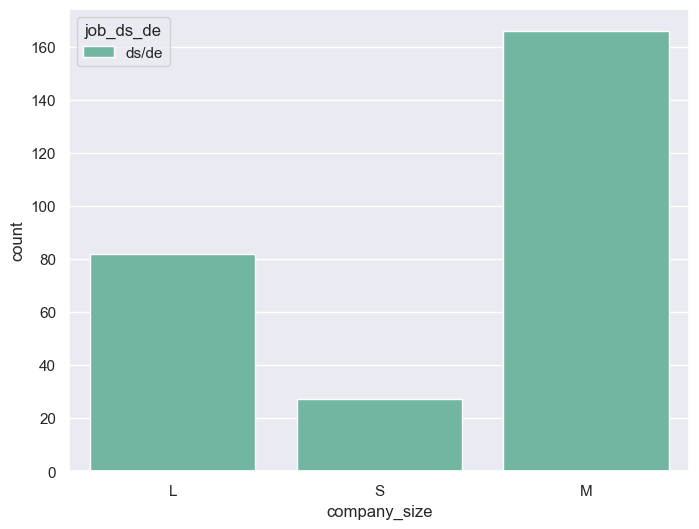

In [233]:
# задаём параметры гистограммы
plt.figure(figsize=(8,6))
sns.countplot(x='company_size',hue='job_ds_de',data=data_j_c);

### 5.Какие факторы влияют на зарплату специалиста Data Scientist.  

5.1. Построение матрицы корреляции Присона, кодировка категориальных признаков

Закодируем признаки experience_level, employment_type, remote_ratio,company_size

In [234]:
data_copy=data_scientist_data.copy()
data_copy.head()
data_copy=data_copy.drop(['salary', 'salary_currency'], axis=1)
data_copy.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,39916,FR,0,FR,M


<Axes: >

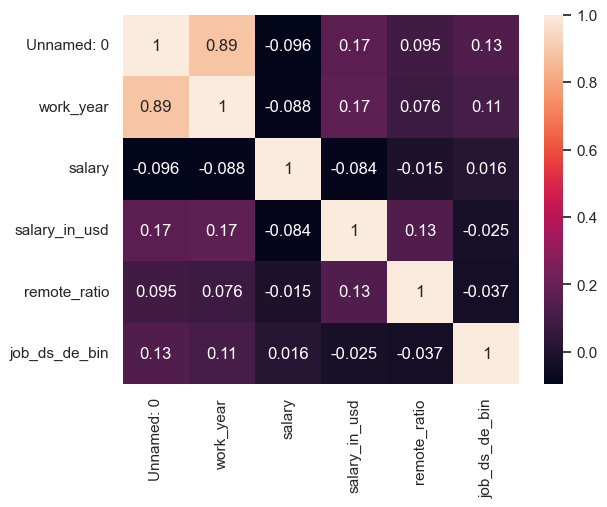

In [235]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

закодируем категориальные признаки

In [239]:
ord_encoder=ce.OrdinalEncoder(cols=['experience_level','employment_type','company_size','employee_residence'])
data_copy[['experience_level_cod','employment_type_cod','company_size_cod', 'employee_residence_cod']]= ord_encoder.fit_transform(data_copy[['experience_level','employment_type','company_size','employee_residence']])
data_copy.info()
data_copy.head()
data_copy=data_copy.drop(['experience_level', 'employment_type','company_size','employee_residence'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              143 non-null    int64 
 1   work_year               143 non-null    int64 
 2   experience_level        143 non-null    object
 3   employment_type         143 non-null    object
 4   job_title               143 non-null    object
 5   salary_in_usd           143 non-null    int64 
 6   employee_residence      143 non-null    object
 7   remote_ratio            143 non-null    int64 
 8   company_location        143 non-null    object
 9   company_size            143 non-null    object
 10  experience_level_cod    143 non-null    int32 
 11  employment_type_cod     143 non-null    int32 
 12  company_size_cod        143 non-null    int32 
 13  employee_residence_cod  143 non-null    int32 
dtypes: int32(4), int64(4), object(6)
memory usage: 14.5+ KB


In [240]:
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data_copy['salary_in_usd'])

print('p-value = %.6f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.000038
Распределение не нормальное


Корреляция Пирсона, в нашем случае не совсем информативна т.к работает на нормальном распределении

<Axes: >

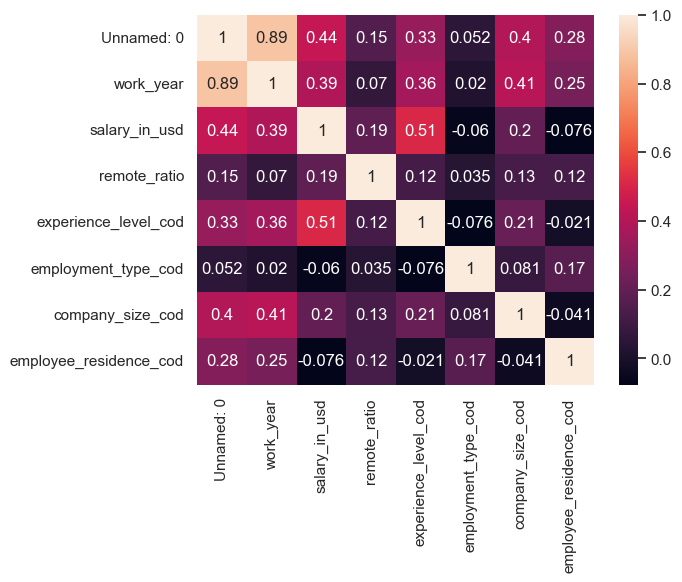

In [241]:
sns.heatmap(data_copy.corr(numeric_only=True), annot=True)

5.2. Коэфициенты корреляции Спирмена, визуализация. 

Расчитаем коэффициенты корреляции Спирмена. 

In [ ]:
k_spearment=data_copy['salary_in_usd'].corr(data_copy['company_size_cod'], method='spearman')
print('Корреляция Спирмена для признака ЗП и размер компании:',round(k_spearment,2))

Корреляция Спирмена для признака ЗП и размер компании: 0.28


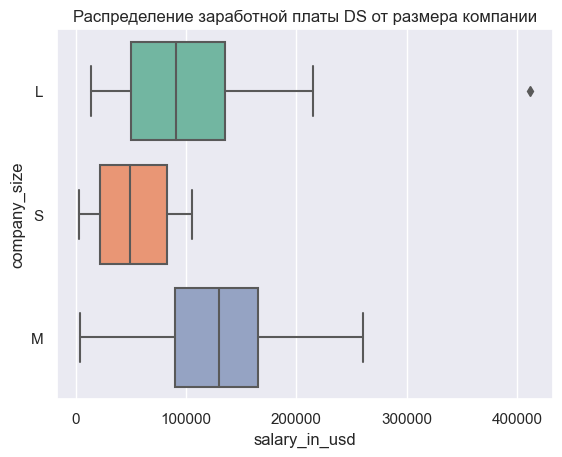

In [ ]:
ax = sns.boxplot(data_scientist_data, x='salary_in_usd',y='company_size', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS от размера компании')
plt.show()

In [ ]:
k_spearment=data_copy['salary_in_usd'].corr(data_copy['experience_level_cod'], method='spearman')
print('Корреляция Спирмена для признака ЗП и опыта работы :',round(k_spearment,2))

Корреляция Спирмена для признака ЗП и опыта работы : 0.53


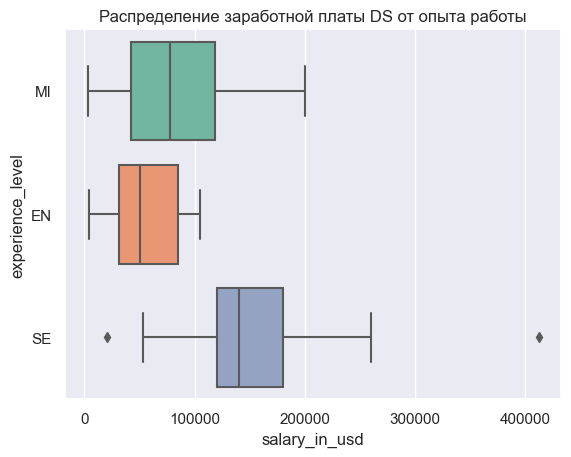

In [ ]:
ax = sns.boxplot(data_scientist_data, x='salary_in_usd',y='experience_level', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS от опыта работы')
plt.show()

In [ ]:
k_spearment=data_copy['salary_in_usd'].corr(data_copy['remote_ratio'], method='spearman')
print('Корреляция Спирмена для признака ЗП и объема работ выполняемого удаленно :',round(k_spearment,2))

Корреляция Спирмена для признака ЗП и объема работ выполняемого удаленно : 0.2


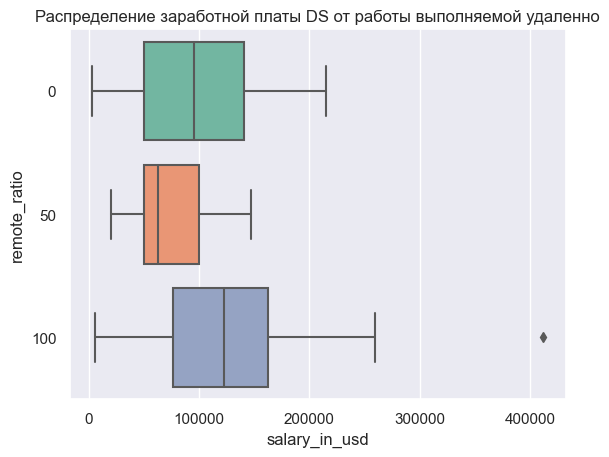

In [ ]:
ax = sns.boxplot(data_scientist_data, x='salary_in_usd',y='remote_ratio', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS от работы выполняемой удаленно')
plt.show()

In [ ]:
k_spearment=data_copy['salary_in_usd'].corr(data_copy['employment_type_cod'], method='spearman')
print('Корреляция Спирмена для признака ЗП и типом трудоустройства :',round(k_spearment,2))

Корреляция Спирмена для признака ЗП и типом трудоустройства : -0.08


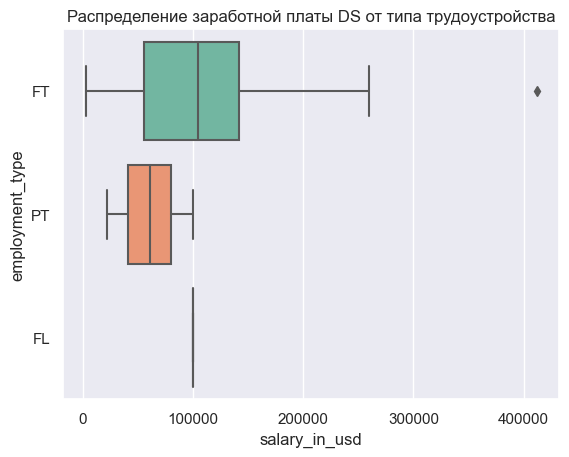

In [ ]:
ax = sns.boxplot(data_scientist_data, x='salary_in_usd',y='employment_type', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS от типа трудоустройства')
plt.show()

In [ ]:
k_spearment=data_copy['salary_in_usd'].corr(data_copy['work_year'], method='spearman')
print('Корреляция Спирмена для признака ЗП и годом выплаты зп :',round(k_spearment,2))

Корреляция Спирмена для признака ЗП и годом выплаты зп : 0.51


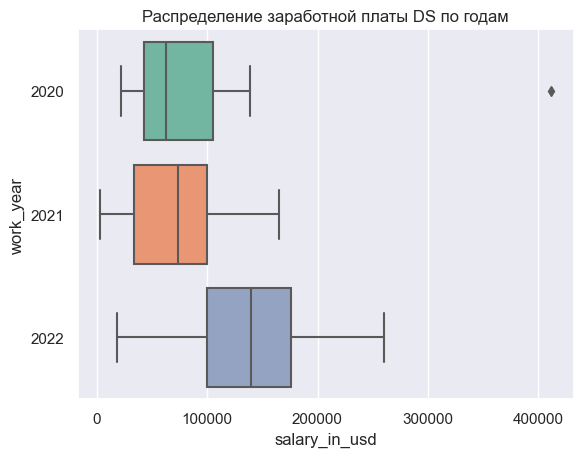

In [ ]:
ax = sns.boxplot(data_copy, x='salary_in_usd',y='work_year', orient='h')
ax.set(xlabel='salary_in_usd')
plt.title('Распределение заработной платы DS по годам')
plt.show()

Вывод: Существует умеренная связь между ЗП и опытом работы к=0.53, и годом выплаты ЗП к=0.51. Слабую связь между ЗП и объемом работ выполняемых удаленно и размером компании.